<a href="https://colab.research.google.com/github/abdulrahimq/audio-to-stress/blob/main/wav_to_vec_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://github.com/openai/whisper/blob/main/whisper/audio.py

In [ ]:
!pip install -U openai-whisper
from whisper import audio


In [ ]:
array = audio.load_audio("/content/LL-Q55633582_%28ajp%29-AdrianAbdulBaha-%D8%A2%D8%B3%D9%8A%D8%A7.wav")
print(array.shape)

(18061,)


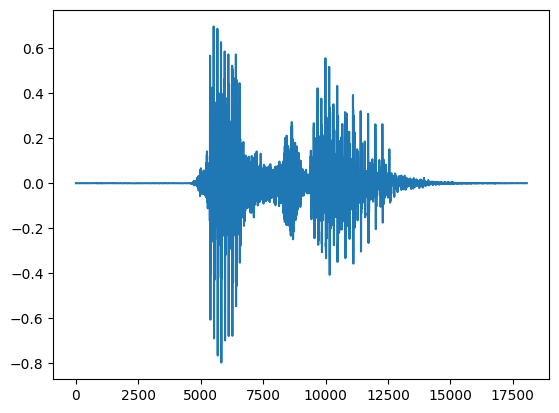

In [ ]:
import matplotlib.pyplot as plt
plt.plot(array)


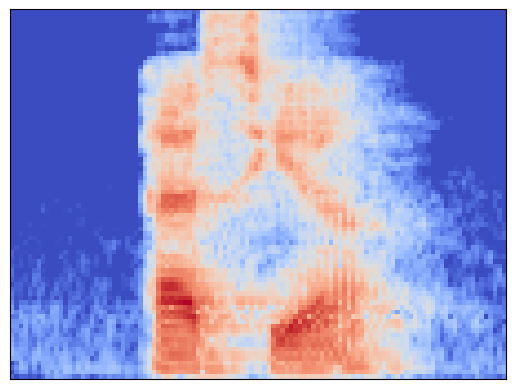

In [ ]:
import librosa
import numpy as np
sp = np.array(audio.log_mel_spectrogram(array, 80, 0))
librosa.display.specshow(sp)

In [ ]:
import soundfile

In [5]:
import pandas as pd
import numpy as np

In [137]:
df = pd.read_csv("Arabic_Stress _Training_Data_Sheet1.csv")

In [138]:
df.info()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ipa         99 non-null     object
 1   audio_urls  89 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


(99, 2)

In [139]:
df.head(10)

,ipa,audio_urls
0,ʔāḵir<p:ʔæː.xɪr><p:ʔaː.xɪr>,https://upload.wikimedia.org/wikipedia/commons...
1,ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>,https://upload.wikimedia.org/wikipedia/commons...
2,ʔāḏār<p:ʔaˈðˤɑːrˤ><p:ʔaˈzˤɑːrˤ>,NaN
3,ʔāsef<p:ˈʔæː.sɪf>,https://upload.wikimedia.org/wikipedia/commons...
4,ʔāsya<p:ˈʔæːs.ja>,https://upload.wikimedia.org/wikipedia/commons...
5,ʔālāf<p:ʔaˈlæːf>,https://upload.wikimedia.org/wikipedia/commons...
6,ʔāle<p:ˈʔæː.le> ʔāla<p:ˈʔæː.la>,https://upload.wikimedia.org/wikipedia/commons...
7,ʔāman<p:ˈʔæː.man>,https://upload.wikimedia.org/wikipedia/commons...
8,ʔānas<p:ˈʔæː.nas>,https://upload.wikimedia.org/wikipedia/commons...
9,ʔā<p:ʔɑː>,https://upload.wikimedia.org/wikipedia/commons...


In [140]:
df['ipa']

,ipa
0,ʔāḵir<p:ʔæː.xɪr><p:ʔaː.xɪr>
1,ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>
2,ʔāḏār<p:ʔaˈðˤɑːrˤ><p:ʔaˈzˤɑːrˤ>
3,ʔāsef<p:ˈʔæː.sɪf>
4,ʔāsya<p:ˈʔæːs.ja>
...,...
94,ʔaṣarr<p:ʔɑˈsˤɑr>
95,ʔaṣfar<p:ˈʔɑsˤ.fɑrˤ>
96,ʔaṣlaḥ<p:ˈʔɑsˤ.lˤɑħ>
97,ʔaṣanṣēr<p:ʔɑ.sˤɑnˈsˤeːr>


In [141]:
"""
clean_transcription(dataframe)

A function that takes the ipa column of dataframe and cleans it.
first isolates all the strings between '<' and '>', deletes everything else, then
removes every occurence of 'p',':', and '<'/'>' from the result, returning a list of
raw ipa transcriptions separated by ','
"""
import re

def clean_transcription(dataframe):
  for i in range(len(dataframe)):
    r = re.findall("<.*?>", dataframe[i])
    for k in range(len(r)):
      r[k] = re.sub("[p:><]", "", r[k])
    dataframe[i] = ", ".join(r)

In [142]:
clean_transcription(df['ipa'])
df.head(10)


,ipa,audio_urls
0,"ʔæː.xɪr, ʔaː.xɪr",https://upload.wikimedia.org/wikipedia/commons...
1,"ˈʔæːx.re, ˈʔæːx.ra",https://upload.wikimedia.org/wikipedia/commons...
2,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",NaN
3,ˈʔæː.sɪf,https://upload.wikimedia.org/wikipedia/commons...
4,ˈʔæːs.ja,https://upload.wikimedia.org/wikipedia/commons...
5,ʔaˈlæːf,https://upload.wikimedia.org/wikipedia/commons...
6,"ˈʔæː.le, ˈʔæː.la",https://upload.wikimedia.org/wikipedia/commons...
7,ˈʔæː.man,https://upload.wikimedia.org/wikipedia/commons...
8,ˈʔæː.nas,https://upload.wikimedia.org/wikipedia/commons...
9,ʔɑː,https://upload.wikimedia.org/wikipedia/commons...


In [136]:
import re
"""
s = "ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>"
s = "?akir<p:?æx.xIr><p:?a:.xir>"
r = re.findall("<.*?>", s)
for i in range(len(r)):
  r[i] = re.sub("[<p:>]", "", r[i])
s = ", ".join(r)
print(s)
"""
dataframe = ["ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>","?akir<p:?æx.xIr><p:?a:.xir>"]
for i in range(len(dataframe)):
  r = re.findall("<.*?>", dataframe[i])
  print(r)
  for k in range(len(r)):
    r[k] = re.sub("[p:><]", "", r[k])
  dataframe[i] = ", ".join(r)
print(dataframe)

['<p:ˈʔæːx.re>', '<p:ˈʔæːx.ra>']
['<p:?æx.xIr>', '<p:?a:.xir>']
['ˈʔæːx.re, ˈʔæːx.ra', '?æx.xIr, ?a.xir']
